#### Mutual information score

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Seperating X and Y

In [5]:
X = df.drop(columns=['PassengerId','Survived','Name','Ticket'])
Y = df[['Survived']]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [7]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


#### Seperate cat and con features form X to create the pipeline

In [8]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [9]:
cat

['Sex', 'Cabin', 'Embarked']

In [10]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

#### create cat and con pipeline

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [12]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='unknown')),
                            ('ordinal',OrdinalEncoder())])
pre1 = ColumnTransformer([('con',num_pipe1,con),
                          ('cat',cat_pipe1,cat)])

In [13]:
pre1

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='unknown',
                                                                strategy='constant')),
                                                 ('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Sex', 'Cabin', 'Embarked'])])

In [14]:
X_pre=pre1.fit_transform(X)
X_pre

array([[ 8.27377244e-01, -5.65736461e-01,  4.32793366e-01, ...,
         1.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00,  6.63861032e-01,  4.32793366e-01, ...,
         0.00000000e+00,  8.10000000e+01,  0.00000000e+00],
       [ 8.27377244e-01, -2.58337088e-01, -4.74545196e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       ...,
       [ 8.27377244e-01, -1.04637401e-01,  4.32793366e-01, ...,
         0.00000000e+00,  1.47000000e+02,  2.00000000e+00],
       [-1.56610693e+00, -2.58337088e-01, -4.74545196e-01, ...,
         1.00000000e+00,  6.00000000e+01,  0.00000000e+00],
       [ 8.27377244e-01,  2.02761972e-01, -4.74545196e-01, ...,
         1.00000000e+00,  1.47000000e+02,  1.00000000e+00]])

In [15]:
### Take column names separatly out 
cols = pre1.get_feature_names_out()
cols

array(['con__Pclass', 'con__Age', 'con__SibSp', 'con__Parch', 'con__Fare',
       'cat__Sex', 'cat__Cabin', 'cat__Embarked'], dtype=object)

In [16]:
#### Convert that into dataframe

X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,con__Pclass,con__Age,con__SibSp,con__Parch,con__Fare,cat__Sex,cat__Cabin,cat__Embarked
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,1.0,147.0,2.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,0.0,81.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,0.0,147.0,2.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,0.0,55.0,2.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,1.0,147.0,2.0
...,...,...,...,...,...,...,...,...
886,-0.369365,-0.181487,-0.474545,-0.473674,-0.386671,1.0,147.0,2.0
887,-1.566107,-0.796286,-0.474545,-0.473674,-0.044381,0.0,30.0,2.0
888,0.827377,-0.104637,0.432793,2.008933,-0.176263,0.0,147.0,2.0
889,-1.566107,-0.258337,-0.474545,-0.473674,-0.044381,1.0,60.0,0.0


#### Feature selection with mutual information score

In [17]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_pre,Y)
mi

array([0.06588328, 0.05509614, 0.00732887, 0.0089848 , 0.14047573,
       0.14400893, 0.05891197, 0.01720061])

In [18]:
mi = pd.Series(mi,index=X_pre.columns)
mi=mi.sort_values(ascending=False)
mi

cat__Sex         0.144009
con__Fare        0.140476
con__Pclass      0.065883
cat__Cabin       0.058912
con__Age         0.055096
cat__Embarked    0.017201
con__Parch       0.008985
con__SibSp       0.007329
dtype: float64

<Axes: >

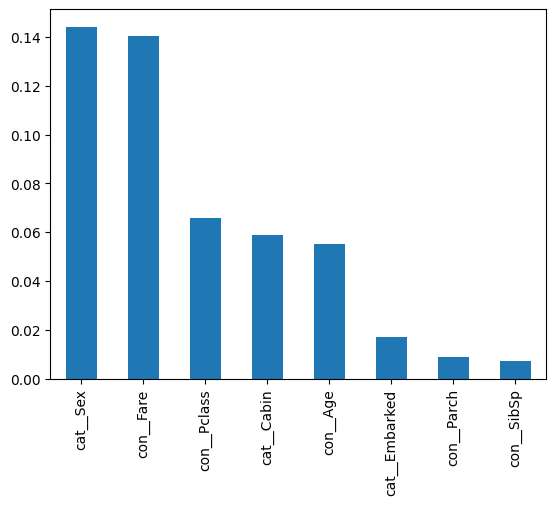

In [19]:
### Plot the mutual information score

mi.plot(kind='bar')

In [20]:
### Manual selection for features
sel_col=mi.index[:6]
sel_col

Index(['cat__Sex', 'con__Fare', 'con__Pclass', 'cat__Cabin', 'con__Age',
       'cat__Embarked'],
      dtype='object')

In [21]:
### Automated selection of features 

from sklearn.feature_selection import SelectKBest
sel = SelectKBest(mutual_info_classif,k=5)
sel_featurs = sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_col


Index(['cat__Sex', 'con__Fare', 'con__Pclass', 'cat__Cabin', 'con__Age',
       'cat__Embarked'],
      dtype='object')

In [22]:
sel_col[0].split('__')[1]

'Sex'

In [23]:
imp_cols = []
for i in sel_col:
    s =i.split('__')[1]
    imp_cols.append(s)
imp_cols

['Sex', 'Fare', 'Pclass', 'Cabin', 'Age', 'Embarked']

In [31]:
### Select imp column frim X

X_sel = X[imp_cols]
X_sel

,Sex,Fare,Pclass,Cabin,Age,Embarked
0,male,7.2500,3,NaN,22.0,S
1,female,71.2833,1,C85,38.0,C
2,female,7.9250,3,NaN,26.0,S
3,female,53.1000,1,C123,35.0,S
4,male,8.0500,3,NaN,35.0,S
...,...,...,...,...,...,...
886,male,13.0000,2,NaN,27.0,S
887,female,30.0000,1,B42,19.0,S
888,female,23.4500,3,NaN,NaN,S
889,male,30.0000,1,C148,26.0,C


### Create final pipeline

##### have to add ohe for cat features

In [32]:
### Separate cat and con features from selected new columns

cat_selected = list(X_sel.columns[X_sel.dtypes=='object'])

con_selected = list(X_sel.columns[X_sel.dtypes!='object'])

In [33]:
num_pipe2 = Pipeline([('impute',SimpleImputer(strategy='median')),
                      ('scaler',StandardScaler())])

cat_pipe2 = Pipeline([('impute',SimpleImputer(strategy='constant',fill_value='unkown')),
                      ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre2 = ColumnTransformer([('con',num_pipe2,con_selected),
                          ('cat',cat_pipe2,cat_selected)])
pre2

ColumnTransformer(transformers=[('con',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Fare', 'Pclass', 'Age']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(fill_value='unkown',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Cabin', 'Embarked'])])

In [35]:
X_sel_pre = pre2.fit_transform(X_sel).toarray()
X_sel_pre

array([[-0.50244517,  0.82737724, -0.56573646, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.78684529, -1.56610693,  0.66386103, ...,  0.        ,
         0.        ,  0.        ],
       [-0.48885426,  0.82737724, -0.25833709, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.17626324,  0.82737724, -0.1046374 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.04438104, -1.56610693, -0.25833709, ...,  0.        ,
         0.        ,  0.        ],
       [-0.49237783,  0.82737724,  0.20276197, ...,  1.        ,
         0.        ,  0.        ]])

In [36]:
final_cols = pre2.get_feature_names_out()
final_cols

array(['con__Fare', 'con__Pclass', 'con__Age', 'cat__Sex_female',
       'cat__Sex_male', 'cat__Cabin_A10', 'cat__Cabin_A14',
       'cat__Cabin_A16', 'cat__Cabin_A19', 'cat__Cabin_A20',
       'cat__Cabin_A23', 'cat__Cabin_A24', 'cat__Cabin_A26',
       'cat__Cabin_A31', 'cat__Cabin_A32', 'cat__Cabin_A34',
       'cat__Cabin_A36', 'cat__Cabin_A5', 'cat__Cabin_A6',
       'cat__Cabin_A7', 'cat__Cabin_B101', 'cat__Cabin_B102',
       'cat__Cabin_B18', 'cat__Cabin_B19', 'cat__Cabin_B20',
       'cat__Cabin_B22', 'cat__Cabin_B28', 'cat__Cabin_B3',
       'cat__Cabin_B30', 'cat__Cabin_B35', 'cat__Cabin_B37',
       'cat__Cabin_B38', 'cat__Cabin_B39', 'cat__Cabin_B4',
       'cat__Cabin_B41', 'cat__Cabin_B42', 'cat__Cabin_B49',
       'cat__Cabin_B5', 'cat__Cabin_B50', 'cat__Cabin_B51 B53 B55',
       'cat__Cabin_B57 B59 B63 B66', 'cat__Cabin_B58 B60',
       'cat__Cabin_B69', 'cat__Cabin_B71', 'cat__Cabin_B73',
       'cat__Cabin_B77', 'cat__Cabin_B78', 'cat__Cabin_B79',
       'cat__Cabin

In [37]:
X_sel_pre = pd.DataFrame(X_sel_pre,columns=final_cols)
X_sel_pre

,con__Fare,con__Pclass,con__Age,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unkown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unkown
0,-0.502445,0.827377,-0.565736,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.786845,-1.566107,0.663861,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.488854,0.827377,-0.258337,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.420730,-1.566107,0.433312,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.486337,0.827377,0.433312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.386671,-0.369365,-0.181487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
887,-0.044381,-1.566107,-0.796286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
888,-0.176263,0.827377,-0.104637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
889,-0.044381,-1.566107,-0.258337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Separate Train and Test Data

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=42)

In [40]:
xtrain.shape

(712, 157)

In [41]:
xtest.shape

(179, 157)

#### Create Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [43]:
model.score(xtrain,ytrain)

0.8300561797752809

In [44]:
model.score(xtest,ytest)

0.8044692737430168

##### Prdict the result

In [45]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [48]:
ypred_tr[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [50]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [51]:
ypred_ts[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [52]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


##### Print confusion matrix

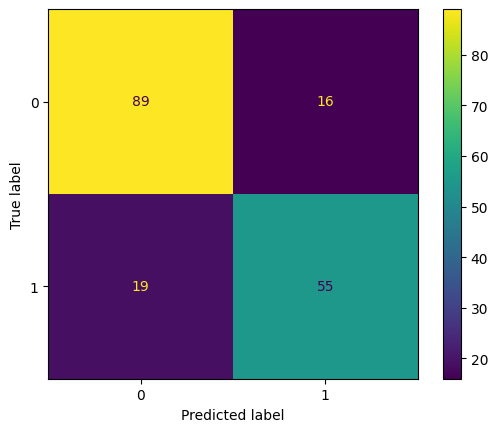

In [54]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd =  ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

##### Check classification report

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ypred_ts,ytest))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       108
           1       0.74      0.77      0.76        71

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.80      0.81       179



##### Predict the result for the test data 

In [58]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [59]:
xnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


##### Apply preprocessing and use transform if we are doing prediction

In [61]:
xnew_pre = pre2.transform(xnew).toarray()
xnew_pre

array([[-0.49078316,  0.82737724,  0.39488658, ...,  1.        ,
         0.        ,  0.        ],
       [-0.50747884,  0.82737724,  1.35550962, ...,  0.        ,
         1.        ,  0.        ],
       [-0.45336687, -0.36936484,  2.50825727, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.50244517,  0.82737724,  0.70228595, ...,  0.        ,
         1.        ,  0.        ],
       [-0.48633742,  0.82737724, -0.1046374 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.19824428,  0.82737724, -0.1046374 , ...,  0.        ,
         0.        ,  0.        ]])

In [62]:
xnew_pre = pd.DataFrame(xnew_pre,columns=final_cols)
xnew_pre.head()

,con__Fare,con__Pclass,con__Age,cat__Sex_female,cat__Sex_male,cat__Cabin_A10,cat__Cabin_A14,cat__Cabin_A16,cat__Cabin_A19,cat__Cabin_A20,...,cat__Cabin_F33,cat__Cabin_F38,cat__Cabin_F4,cat__Cabin_G6,cat__Cabin_T,cat__Cabin_unkown,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S,cat__Embarked_unkown
0,-0.490783,0.827377,0.394887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,-0.507479,0.827377,1.355510,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.453367,-0.369365,2.508257,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.474005,0.827377,-0.181487,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.401017,0.827377,-0.565736,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Prediction

In [64]:
preds = model.predict(xnew_pre)
preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [68]:
prob = model.predict_proba(xnew_pre)[:,1]  ## Probability for survival
prob

array([0.10963927, 0.42899635, 0.12379863, 0.09141085, 0.58469979,
       0.12236933, 0.62977045, 0.19127872, 0.72830085, 0.10486855,
       0.08934079, 0.24665847, 0.92747926, 0.08543389, 0.83797347,
       0.840928  , 0.21772369, 0.16769975, 0.55382344, 0.57648184,
       0.31115495, 0.13642082, 0.86396499, 0.51470871, 0.92579747,
       0.05349572, 0.95753079, 0.16251046, 0.39615493, 0.14477921,
       0.11461734, 0.19920749, 0.51671967, 0.54802863, 0.52210066,
       0.17664138, 0.5476167 , 0.59068658, 0.09567424, 0.08976868,
       0.11373648, 0.47610502, 0.06611229, 0.7248989 , 0.88008265,
       0.09565953, 0.5055193 , 0.12660714, 0.89691109, 0.49777552,
       0.5020887 , 0.28409123, 0.77223291, 0.88300543, 0.27902616,
       0.18584953, 0.07604044, 0.14467732, 0.08941289, 0.94190542,
       0.11449546, 0.16882328, 0.11197373, 0.67525144, 0.70880347,
       0.73496388, 0.69687193, 0.24234936, 0.59226519, 0.77171814,
       0.66414897, 0.1047039 , 0.54138842, 0.60730469, 0.94296

In [70]:
df_final = xnew[['PassengerId']]
df_final

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [71]:
df_final['Survived_pred']=preds
df_final['Survived_prob']=prob

In [72]:
df_final

,PassengerId,Survived_pred,Survived_prob
0,892,0,0.109639
1,893,0,0.428996
2,894,0,0.123799
3,895,0,0.091411
4,896,1,0.584700
...,...,...,...
413,1305,0,0.089342
414,1306,1,0.936669
415,1307,0,0.070089
416,1308,0,0.089342


<Axes: xlabel='Survived_pred'>

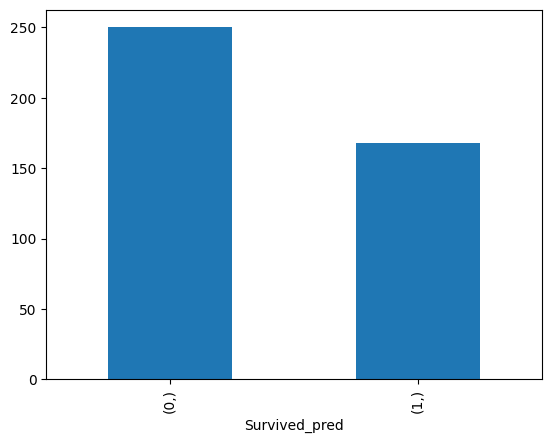

In [78]:
df_final[['Survived_pred']].value_counts().plot(kind='bar')

### Save the file to results.csv

In [73]:
df_final.to_csv('results.csv',index=False)